In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
results = np.genfromtxt('/home/jains/Documents/widthdepthsweeps.csv', delimiter=',', dtype=None, names=True)
print(len(results), results.dtype)

346 [('layer_type', 'S33'), ('fp16', 'S4'), ('LR', '<f8'), ('d_model_encoder_embed_dim', '<i8'), ('d_ffn_encoder_ffn_embed_dim', '<i8'), ('n_heads_encoder_attention_heads', '<i8'), ('d_head_encoder_head_dim', '<i8'), ('n_layers_encoder_layers', '<i8'), ('d_model_decoder_embed_dim', '<i8'), ('d_ffn_decoder_ffn_embed_dim', '<i8'), ('n_heads_decoder_attention_heads', '<i8'), ('d_head_decoder_head_dim', '<i8'), ('n_layers_decoder_layers', '<i8'), ('Total_Params_formula_no_bias_or_LayerNorm_params', '<i8'), ('dropout', '<f8'), ('batch_size_maxtokens', '<i8'), ('trainable_params_fairseq_log', 'S11'), ('application_id', 'S20'), ('experiment', 'S8'), ('BEST_BLEU_VAL_EPOCH_10', 'S156'), ('BEST_BLEU_VAL_EPOCH_20', '<f8'), ('BEST_BLEU_VAL_EPOCH_30', '<f8'), ('BEST_BLEU_VAL_EPOCH_120', '<f8'), ('BEST_LOSS_VAL_EPOCH_10', 'S156'), ('BEST_LOSS_VAL_EPOCH_20', '<f8'), ('BEST_LOSS_VAL_EPOCH_30', '<f8'), ('BEST_LOSS_VAL_EPOCH_120', '<f8'), ('BEST_LOSS_TRAIN_EPOCH_10', 'S156'), ('BEST_LOSS_TRAIN_EPOCH_20'

/data/home/jains/Documents/env/torchvenv/lib/python3.5/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'best loss_train vs n_layers')

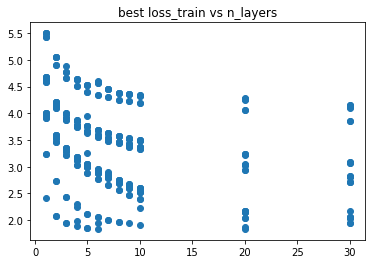

In [4]:
plt.scatter(results['n_layers_encoder_layers'], results['BEST_LOSS_TRAIN_EPOCH_1'])
plt.title('best loss_train vs n_layers')

Text(0.5, 1.0, 'Median train_wall vs n_layers')

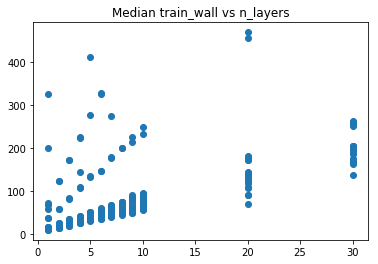

In [5]:
plt.scatter(results['n_layers_encoder_layers'], results['Median'])
plt.title('Median train_wall vs n_layers')

#### train_loss vs width

In [6]:
# We expect 106 baseline trials.
# width=2048: {1...6}
# width=1024: {1...10,20}
# width=512: {1...10,20,30}
# width=256: {1...10,20,30}
# width=128: {1...10,20,30}
# total: 53 width-depth combos
# 53*2 runs per combo = 106 trials
baseline_results = results[results['layer_type'] == b'baseline']
print(len(baseline_results))

106


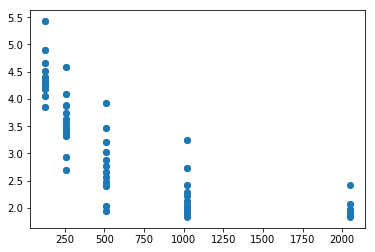

In [7]:
# all plotted w/o series separation...
plt.scatter(
    baseline_results['d_model_encoder_embed_dim'],
    baseline_results['BEST_LOSS_TRAIN_EPOCH_1'],
)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

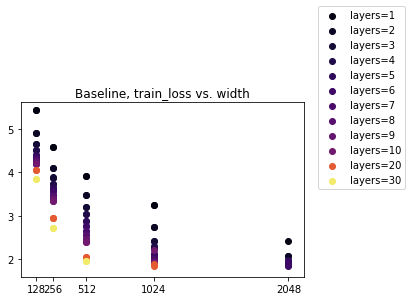

In [8]:
#split on layers
all_layers = np.unique(baseline_results['n_layers_encoder_layers'])
for layer in all_layers:
    layers_slice = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]
    plt.scatter(
        layers_slice['d_model_encoder_embed_dim'],
        layers_slice['BEST_LOSS_TRAIN_EPOCH_1'],
        label='layers={}'.format(layer),
        c=cm.inferno.colors[layer*8]
    )

plt.title('Baseline, train_loss vs. width')
plt.xticks([128, 256, 512, 1024, 2048])
plt.xticks([128, 256, 512, 1024, 2048])
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

In [9]:
# 5 different layer types
np.unique(results['layer_type'])

array([b'baseline', b'crs_--strategy_det_top_k__k_256',
       b'crs_--strategy_det_top_k__k_64',
       b'crs_--strategy_single_norm__k_256',
       b'crs_--strategy_single_norm__k_64'], dtype='|S33')

In [10]:
# We expect ??? crs_det_top_k_k_64.
# TODO: width=2048: {1...6}
# TODO: width=1024: {1...10,20}
#
# width=512: {1...10,20,30}
# width=256: {1...10,20,30}
# width=128: {1...10,20,30}
# total: 36 width-depth combos
# 36*2 runs per combo = 72 trials
det_top_k_k_64 = results[results['layer_type'] == b'crs_--strategy_det_top_k__k_64']
len(det_top_k_k_64)

72

In [11]:
# We expect ??? det_top_k_k_256.
# TODO: width=2048: {1...6}
# TODO: width=1024: {1...10,20}
#
# width=512: {1...10,20,30}
# width=256: {1...10,20,30}
# width=128: {}
# total: 24 width-depth combos
# 24*2 runs per combo = 48 trials
det_top_k_k_256 = results[results['layer_type'] == b'crs_--strategy_det_top_k__k_256']
len(det_top_k_k_256)

48

In [12]:
# We expect ??? single_norm_k_64.
# TODO: width=2048: {1...6}
# TODO: width=1024: {1...10,20}
#
# width=512: {1...10,20,30}
# width=256: {1...10,20,30}
# width=128: {1...10,20,30}
# total: 36 width-depth combos
# 36*2 runs per combo = 72 trials
single_norm_k_64 = results[results['layer_type'] == b'crs_--strategy_single_norm__k_64']
len(single_norm_k_64)

72

In [13]:
# We expect ??? single_norm_k_256.
# TODO: width=2048: {1...6}
# TODO: width=1024: {1...10,20}
#
# width=512: {1...10,20,30}
# width=256: {1...10,20,30}
# width=128: {}
# total: 24 width-depth combos
# 24*2 runs per combo = 48 trials
single_norm_k_256 = results[results['layer_type'] == b'crs_--strategy_single_norm__k_256']
len(single_norm_k_256)

48

/data/home/jains/Documents/env/torchvenv/lib/python3.5/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


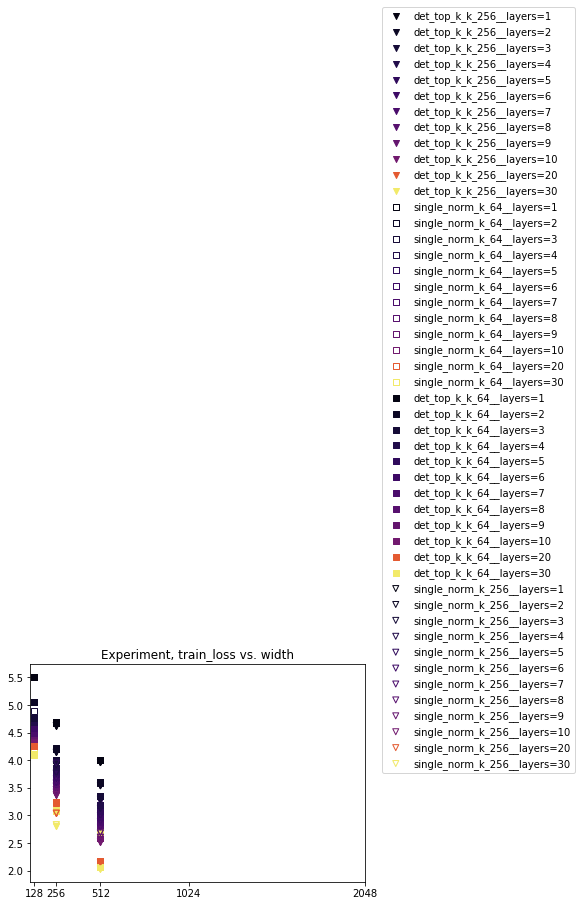

In [14]:
#split on layers
experiments = {
    'det_top_k_k_64': det_top_k_k_64,
    'det_top_k_k_256': det_top_k_k_256,
    'single_norm_k_64': single_norm_k_64,
    'single_norm_k_256': single_norm_k_256,
}
for experiment_name, experiment in experiments.items():
    all_layers = np.unique(experiment['n_layers_encoder_layers'])
    for layer in all_layers:
        layers_slice = experiment[experiment['n_layers_encoder_layers'] == layer]
        color = cm.inferno.colors[layer*8]
        plt.scatter(
            layers_slice['d_model_encoder_embed_dim'],
            layers_slice['BEST_LOSS_TRAIN_EPOCH_1'],
            label='{}__layers={}'.format(experiment_name, layer),
            marker='s' if 'k_64' in experiment_name else 'v',
            edgecolors=color,
            facecolors='none' if 'single' in experiment_name else color,
        )

plt.title('Experiment, train_loss vs. width')
plt.xticks([128, 256, 512, 1024, 2048])
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

#### train_loss vs n_layers

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

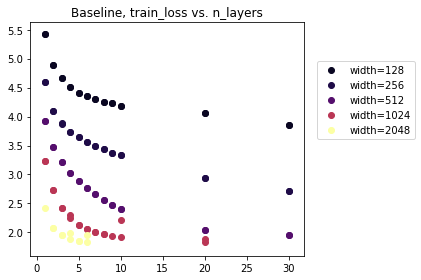

In [15]:
#split on width
all_widths = np.unique(baseline_results['d_model_encoder_embed_dim'])
max_width = max(all_widths)
for width in all_widths:
    width_slice = baseline_results[baseline_results['d_model_encoder_embed_dim'] == width]
    plt.scatter(
        width_slice['n_layers_encoder_layers'],
        width_slice['BEST_LOSS_TRAIN_EPOCH_1'],
        label='width={}'.format(width),
        c=cm.inferno.colors[int(width / max_width * 256) - 1]
    )

plt.title('Baseline, train_loss vs. n_layers')
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

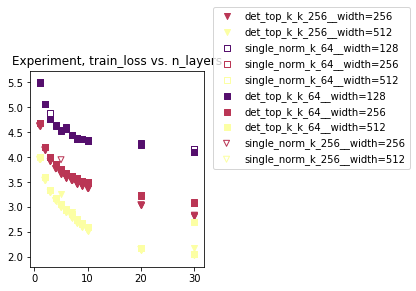

In [16]:
experiments = {
    'det_top_k_k_64': det_top_k_k_64,
    'det_top_k_k_256': det_top_k_k_256,
    'single_norm_k_64': single_norm_k_64,
    'single_norm_k_256': single_norm_k_256,
}
for experiment_name, experiment in experiments.items():
    #split on width
    all_widths = np.unique(experiment['d_model_encoder_embed_dim'])
    max_width = max(all_widths)
    for width in all_widths:
        width_slice = experiment[experiment['d_model_encoder_embed_dim'] == width]
        color = cm.inferno.colors[int(width / max_width * 256) - 1]
        plt.scatter(
            width_slice['n_layers_encoder_layers'],
            width_slice['BEST_LOSS_TRAIN_EPOCH_1'],
            label='{}__width={}'.format(experiment_name, width),
            marker='s' if 'k_64' in experiment_name else 'v',
            edgecolors=color,
            facecolors='none' if 'single' in experiment_name else color,
        )

plt.title('Experiment, train_loss vs. n_layers')
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

#### Baseline Median train_wall vs width

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

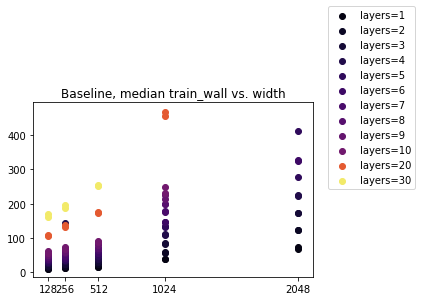

In [17]:
#split on layers
all_layers = np.unique(baseline_results['n_layers_encoder_layers'])
for layer in all_layers:
    layers_slice = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]
    plt.scatter(
        layers_slice['d_model_encoder_embed_dim'],
        layers_slice['Median'],
        label='layers={}'.format(layer),
        c=cm.inferno.colors[layer*8]
    )

plt.title('Baseline, median train_wall vs. width')
plt.xticks([128, 256, 512, 1024, 2048])
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

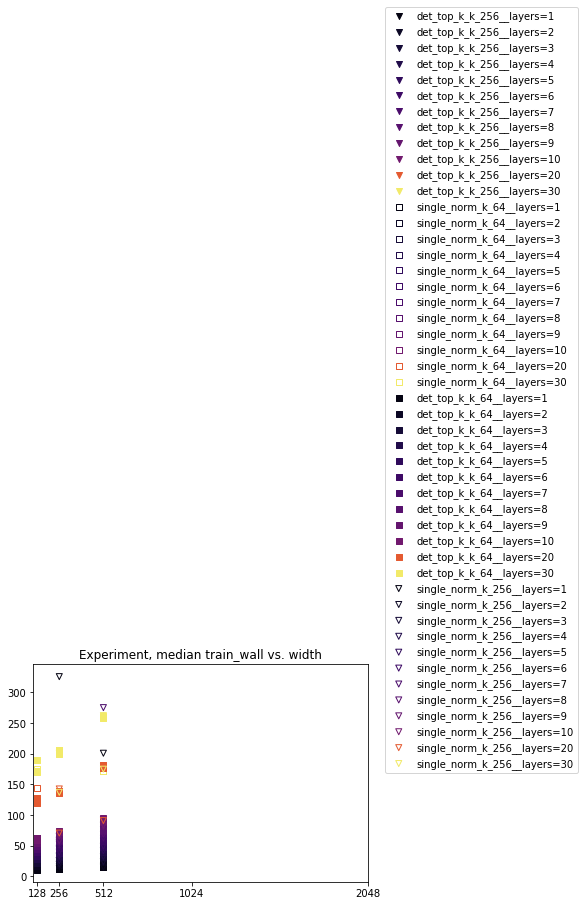

In [18]:
#split on layers
experiments = {
    'det_top_k_k_64': det_top_k_k_64,
    'det_top_k_k_256': det_top_k_k_256,
    'single_norm_k_64': single_norm_k_64,
    'single_norm_k_256': single_norm_k_256,
}
for experiment_name, experiment in experiments.items():
    #split on layers
    all_layers = np.unique(experiment['n_layers_encoder_layers'])
    for layer in all_layers:
        layers_slice = experiment[experiment['n_layers_encoder_layers'] == layer]
        color = cm.inferno.colors[layer*8]
        plt.scatter(
            layers_slice['d_model_encoder_embed_dim'],
            layers_slice['Median'],
            label='{}__layers={}'.format(experiment_name, layer),
            marker='s' if 'k_64' in experiment_name else 'v',
            edgecolors=color,
            facecolors='none' if 'single' in experiment_name else color,
        )

plt.title('Experiment, median train_wall vs. width')
plt.xticks([128, 256, 512, 1024, 2048])
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

#### Baseline Median train_wall vs n_layers

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

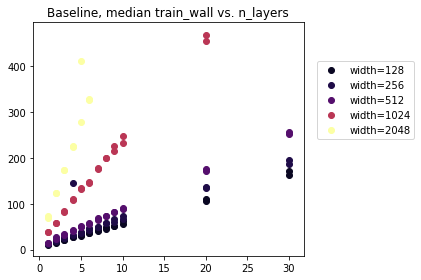

In [19]:
#split on width
all_widths = np.unique(baseline_results['d_model_encoder_embed_dim'])
max_width = max(all_widths)
for width in all_widths:
    width_slice = baseline_results[baseline_results['d_model_encoder_embed_dim'] == width]
    plt.scatter(
        width_slice['n_layers_encoder_layers'],
        width_slice['Median'],
        label='width={}'.format(width),
        c=cm.inferno.colors[int(width / max_width * 256) - 1]
    )

plt.title('Baseline, median train_wall vs. n_layers')
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

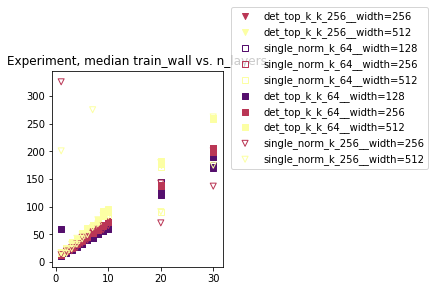

In [20]:
experiments = {
    'det_top_k_k_64': det_top_k_k_64,
    'det_top_k_k_256': det_top_k_k_256,
    'single_norm_k_64': single_norm_k_64,
    'single_norm_k_256': single_norm_k_256,
}
for experiment_name, experiment in experiments.items():
    #split on width
    all_widths = np.unique(experiment['d_model_encoder_embed_dim'])
    max_width = max(all_widths)
    for width in all_widths:
        width_slice = experiment[experiment['d_model_encoder_embed_dim'] == width]
        color = cm.inferno.colors[int(width / max_width * 256) - 1]
        plt.scatter(
            width_slice['n_layers_encoder_layers'],
            width_slice['Median'],
            label='{}__width={}'.format(experiment_name, width),
            edgecolors=color,
            facecolors='none' if 'single' in experiment_name else color,
            marker='s' if 'k_64' in experiment_name else 'v',
        )

plt.title('Experiment, median train_wall vs. n_layers')
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()

#### Speedup vs. width

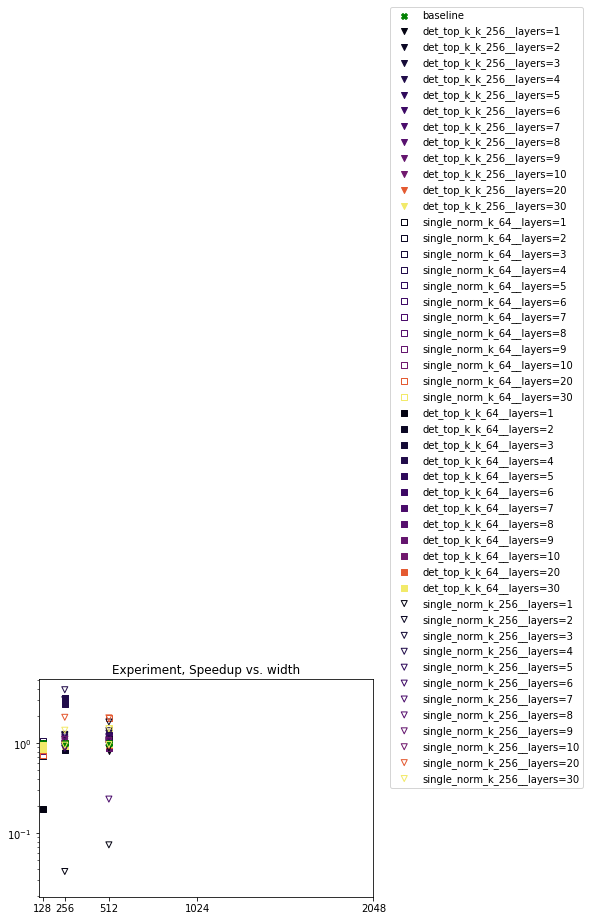

In [21]:
#split on layers
experiments = {
    'det_top_k_k_64': det_top_k_k_64,
    'det_top_k_k_256': det_top_k_k_256,
    'single_norm_k_64': single_norm_k_64,
    'single_norm_k_256': single_norm_k_256,
}
used_legend_names = {}
for experiment_name, experiment in experiments.items():
    #split on layers
    all_layers = np.unique(experiment['n_layers_encoder_layers'])
    all_layers_baseline = np.unique(baseline_results['n_layers_encoder_layers'])
    for layer in all_layers:
        layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]
        layers_slice = experiment[experiment['n_layers_encoder_layers'] == layer]
        
        all_widths_baseline = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
        max_width_baseline = max(all_widths_baseline)
        for width in all_widths_baseline:
            width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]
            train_wall_times = np.array([
                width_slice_baseline['epoch_1'], width_slice_baseline['epoch_2'],
                width_slice_baseline['epoch_3'], width_slice_baseline['epoch_4'],
                width_slice_baseline['epoch_30'],
            ])
            # compute median across 2 trials, 5 measurements/trial
            flat_train_wall_times = train_wall_times.flatten()
            median_train_wall_time_baseline = np.median(flat_train_wall_times)
            # This is the 1x multiplier. Plot it.
            width_slice = layers_slice[layers_slice['d_model_encoder_embed_dim'] == width]
            width_slice_nonan = width_slice[~np.isnan(width_slice['Median'])]            
            
            legend_name = 'baseline'
            if legend_name in used_legend_names:
                legend_name = ''
            else:
                used_legend_names[legend_name] = True
            plt.scatter(
                width_slice_nonan['d_model_encoder_embed_dim'],
                [1 for i in range(len(width_slice_nonan))],
                label=legend_name,
                c='green',
                marker='X',
            )

            # ratio_vs_baseline = width_slice_nonan['Median'] / median_train_wall_time_baseline  # slowdown
            ratio_vs_baseline = median_train_wall_time_baseline / width_slice_nonan['Median']  # speedup
            
            color = cm.inferno.colors[layer*8]
            legend_name = '{}__layers={}'.format(experiment_name, layer)
            if legend_name in used_legend_names:
                legend_name = ''
            else:
                used_legend_names[legend_name] = True
            plt.scatter(
                width_slice_nonan['d_model_encoder_embed_dim'],
                ratio_vs_baseline,
                label=legend_name,
                edgecolors=color,
                facecolors='none' if 'single' in experiment_name else color,
                marker='s' if 'k_64' in experiment_name else 'v',
            )

plt.title('Experiment, Speedup vs. width')
plt.xticks([128, 256, 512, 1024, 2048])
plt.legend(loc=(1.05, 0.5))
plt.tight_layout()
plt.yscale('log')

#### Speedup vs n_layers

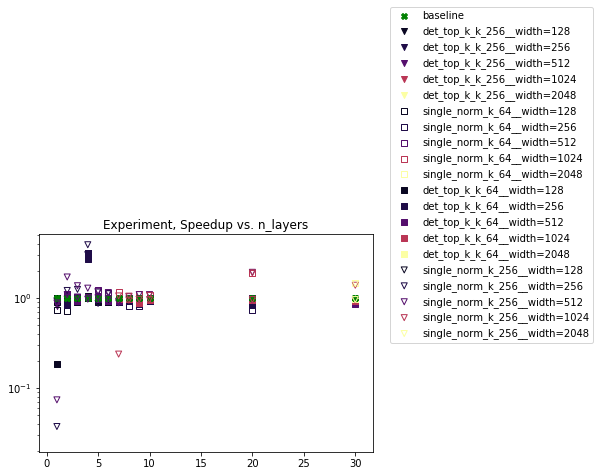

In [22]:
## TODO: fix
#split on layers
experiments = {
    'det_top_k_k_64': det_top_k_k_64,
    'det_top_k_k_256': det_top_k_k_256,
    'single_norm_k_64': single_norm_k_64,
    'single_norm_k_256': single_norm_k_256,
}
used_legend_names = {}
for experiment_name, experiment in experiments.items():
    #split on layers
    all_layers = np.unique(experiment['n_layers_encoder_layers'])
    all_layers_baseline = np.unique(baseline_results['n_layers_encoder_layers'])
    for layer in all_layers:
        layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]
        layers_slice = experiment[experiment['n_layers_encoder_layers'] == layer]
        
        all_widths_baseline = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
        max_width_baseline = max(all_widths_baseline)
        for width in all_widths_baseline:
            width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]
            train_wall_times = np.array([
                width_slice_baseline['epoch_1'], width_slice_baseline['epoch_2'],
                width_slice_baseline['epoch_3'], width_slice_baseline['epoch_4'],
                width_slice_baseline['epoch_30'],
            ])
            # compute median across 2 trials, 5 measurements/trial
            flat_train_wall_times = train_wall_times.flatten()
            median_train_wall_time_baseline = np.median(flat_train_wall_times)
            # This is the 1x multiplier. Plot it.
            width_slice = layers_slice[layers_slice['d_model_encoder_embed_dim'] == width]
            width_slice_nonan = width_slice[~np.isnan(width_slice['Median'])]

            legend_name = 'baseline'
            if legend_name in used_legend_names:
                legend_name = ''
            else:
                used_legend_names[legend_name] = True
            plt.scatter(
                width_slice_nonan['n_layers_encoder_layers'],
                [1 for i in range(len(width_slice_nonan))],
                label=legend_name,
                c='green',
                marker='X',
            )
            
            # ratio_vs_baseline = width_slice_nonan['Median'] / median_train_wall_time_baseline  # slowdown
            ratio_vs_baseline = median_train_wall_time_baseline / width_slice_nonan['Median']  # speedup
            
            color = cm.inferno.colors[int(width / max_width_baseline * 256) - 1]
            legend_name = '{}__width={}'.format(experiment_name, width)
            if legend_name in used_legend_names:
                legend_name = ''
            else:
                used_legend_names[legend_name] = True
            plt.scatter(
                width_slice_nonan['n_layers_encoder_layers'],
                ratio_vs_baseline,
                label=legend_name,
                edgecolors=color,
                facecolors='none' if 'single' in experiment_name else color,
                marker='s' if 'k_64' in experiment_name else 'v',
            )

plt.title('Experiment, Speedup vs. n_layers')
plt.legend(loc=(1.05, 0.5))
# plt.tight_layout()
plt.yscale('log')

### train_loss baseline heatmap (width and depth)

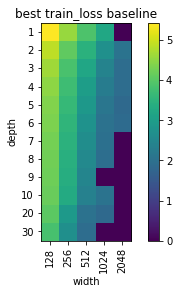

In [27]:
# We expect 106 baseline trials.
# width=2048: {1...6}
# width=1024: {1...10,20}
# width=512: {1...10,20,30}
# width=256: {1...10,20,30}
# width=128: {1...10,20,30}
# total: 53 width-depth combos
# 53*2 runs per combo = 106 trials

all_layers_baseline = np.unique(baseline_results['n_layers_encoder_layers'])
all_widths_baseline = np.unique(baseline_results['d_model_encoder_embed_dim'])

all_train_losses = np.zeros((len(all_layers_baseline), len(all_widths_baseline)))

for layer_idx, layer in enumerate(all_layers):  # depth
    layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]

    all_widths_baseline_ = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
    max_width_baseline = max(all_widths_baseline_)
    for width_idx, width in enumerate(all_widths_baseline_):  # width
        width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]
        
        all_train_losses[layer_idx, width_idx] = np.mean(width_slice_baseline['BEST_LOSS_TRAIN_EPOCH_1'])

np.nan_to_num(all_train_losses, copy=False)

plt.imshow(all_train_losses)
plt.title('best train_loss baseline')
plt.xlabel('width')
plt.xticks(ticks=range(len(all_widths_baseline)), labels=all_widths_baseline, rotation=90)
plt.ylabel('depth')
plt.yticks(ticks=range(len(all_layers_baseline)), labels=all_layers_baseline)
plt.colorbar()

In [ ]:
def make_heatmap(baseline_results, title=''):
    all_layers_baseline = np.unique(baseline_results['n_layers_encoder_layers'])
    all_widths_baseline = np.unique(baseline_results['d_model_encoder_embed_dim'])

    all_train_losses = np.zeros((len(all_layers_baseline), len(all_widths_baseline)))

    for layer_idx, layer in enumerate(all_layers):  # depth
        layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]

        all_widths_baseline_ = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
        max_width_baseline = max(all_widths_baseline_)
        for width_idx, width in enumerate(all_widths_baseline_):  # width
            width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]

            all_train_losses[layer_idx, width_idx] = np.mean(width_slice_baseline['BEST_LOSS_TRAIN_EPOCH_1'])

    np.nan_to_num(all_train_losses, copy=False)

    plt.imshow(all_train_losses)
    plt.title('best train_loss {}'.format(title))
    plt.xlabel('width')
    plt.xticks(ticks=range(len(all_widths_baseline)), labels=all_widths_baseline, rotation=90)
    plt.ylabel('depth')
    plt.yticks(ticks=range(len(all_layers_baseline)), labels=all_layers_baseline)
    plt.colorbar()

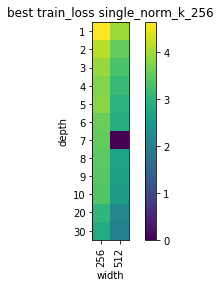

In [34]:
# make_heatmap(baseline_results)
# make_heatmap(det_top_k_k_64, title='det_top_k_k_64')
# make_heatmap(det_top_k_k_256, title='det_top_k_k_256')
# make_heatmap(single_norm_k_64, title='single_norm_k_64')
make_heatmap(single_norm_k_256, title='single_norm_k_256')

(<matplotlib.image.AxesImage at 0x7f651cbc8cf8>,
 array([[4.62699986, 3.95749998],
        [4.14499998, 3.53750002],
        [3.91599989, 3.29699993],
        [3.76799989, 3.13100004],
        [3.80649996, 2.99799991],
        [3.58850002, 2.89050007],
        [3.53349996, 0.        ],
        [3.46949995, 2.6875    ],
        [3.42449999, 2.60650003],
        [3.37599993, 2.52999997],
        [3.0424999 , 2.14950001],
        [2.83300006, 2.03349996]]))

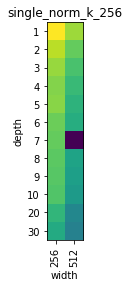

In [161]:
def make_heatmap(baseline_results, ax, title='', field='BEST_LOSS_TRAIN_EPOCH_1', vmin=None, vmax=None):
    all_layers_baseline = np.unique(baseline_results['n_layers_encoder_layers'])
    all_widths_baseline = np.unique(baseline_results['d_model_encoder_embed_dim'])

    all_train_losses = np.zeros((len(all_layers_baseline), len(all_widths_baseline)))

    for layer_idx, layer in enumerate(all_layers):  # depth
        layers_slice_baseline = baseline_results[baseline_results['n_layers_encoder_layers'] == layer]

        all_widths_baseline_ = np.unique(layers_slice_baseline['d_model_encoder_embed_dim'])
        max_width_baseline = max(all_widths_baseline_)
        for width_idx, width in enumerate(all_widths_baseline_):  # width
            width_slice_baseline = layers_slice_baseline[layers_slice_baseline['d_model_encoder_embed_dim'] == width]

            all_train_losses[layer_idx, width_idx] = np.mean(width_slice_baseline[field])

    np.nan_to_num(all_train_losses, copy=False)

    imgresult = ax.imshow(all_train_losses, vmin=vmin, vmax=vmax)
    try:
        ax.set_title(title)
        ax.set_xticks(ticks=range(len(all_widths_baseline)))
        ax.set_xticklabels(labels=all_widths_baseline, rotation=90)
        ax.set_yticks(ticks=range(len(all_layers_baseline)))
        ax.set_yticklabels(labels=all_layers_baseline, rotation=90)
    except:
        ax.title(title)
        ax.xticks(ticks=range(len(all_widths_baseline)), labels=all_widths_baseline, rotation=90)
        ax.yticks(ticks=range(len(all_layers_baseline)), labels=all_layers_baseline)
        ax.xlabel('width')
        ax.ylabel('depth')
    return imgresult, all_train_losses
    
make_heatmap(single_norm_k_256, plt, title='single_norm_k_256')

In [160]:
def get_normalizing_values(field='BEST_LOSS_TRAIN_EPOCH_1'):
    # Get normalizing constants across all datasets.
    # Used to standardize the colormap scales.
    datasets = [
        baseline_results,
        det_top_k_k_64,
        det_top_k_k_256,
        single_norm_k_64,
        single_norm_k_256,
    ]

    vmin = np.inf
    vmax = 0

    for dataset in datasets:        
        cleaned = np.nan_to_num(dataset[field])
        min_value = np.min(cleaned)
        max_value = np.max(cleaned)
        if max_value > vmax:
            vmax = max_value
        if min_value < vmin:
            vmin = min_value

    return vmin, vmax

0.0 5.500999928


Text(0.5, 1.0, 'colorbar')

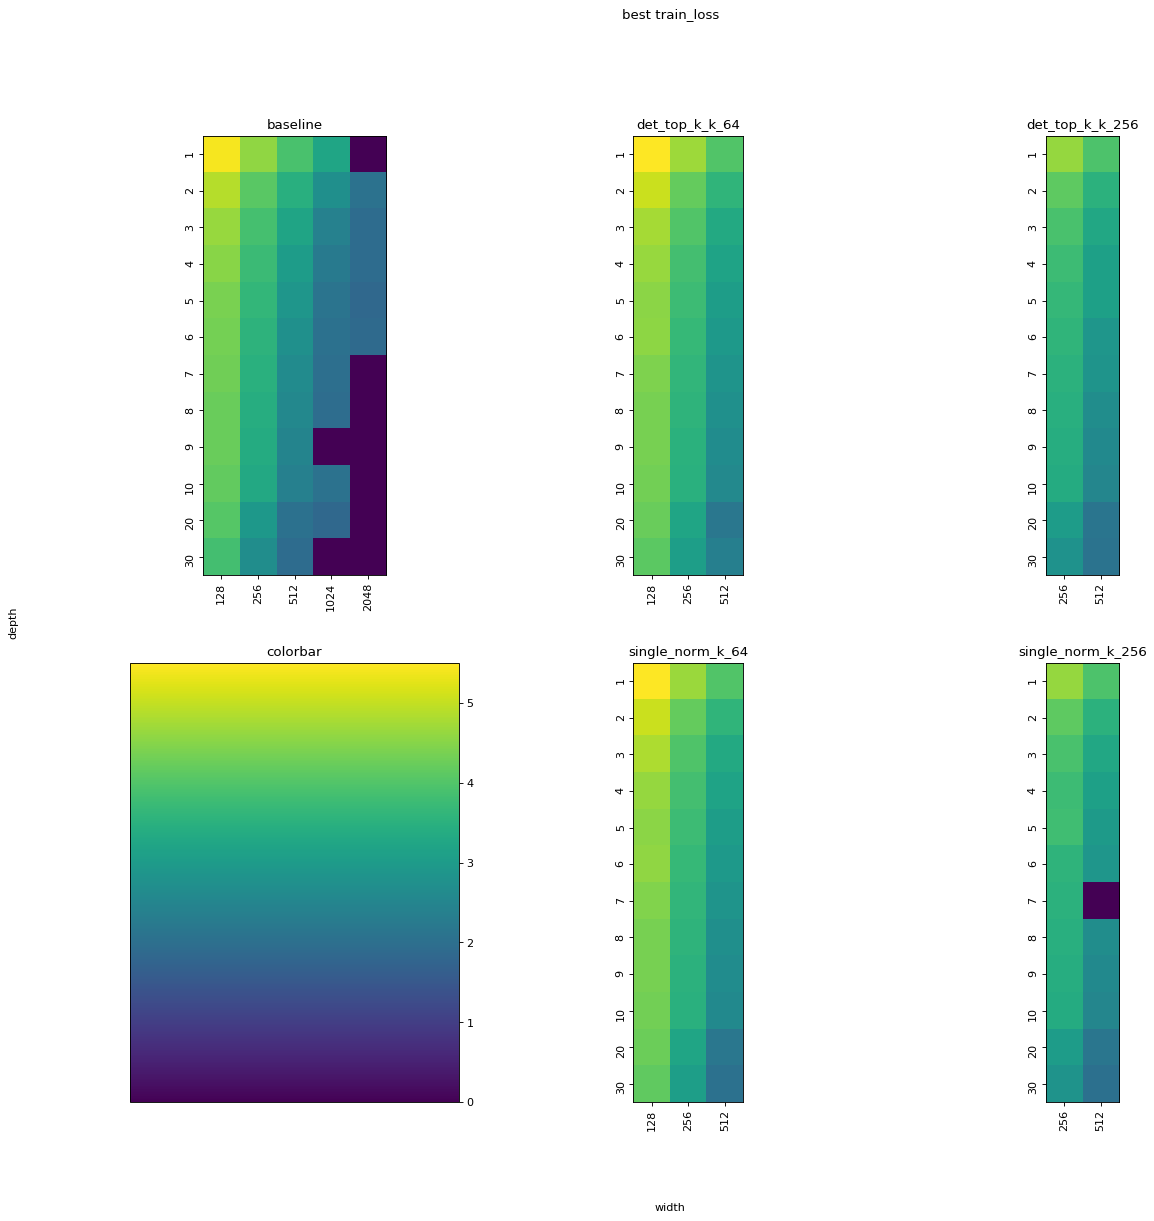

In [170]:
field = 'BEST_LOSS_TRAIN_EPOCH_1'
vmin, vmax = get_normalizing_values(field)
print(vmin, vmax)

fig, all_ax = plt.subplots(2, 3, figsize=(18, 16), dpi= 80)
result = make_heatmap(baseline_results, all_ax[0,0], title='baseline', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(det_top_k_k_64, all_ax[0,1], title='det_top_k_k_64', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(det_top_k_k_256, all_ax[0,2], title='det_top_k_k_256', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(single_norm_k_64, all_ax[1,1], title='single_norm_k_64', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(single_norm_k_256, all_ax[1,2], title='single_norm_k_256', field=field, vmin=vmin, vmax=vmax)

fig.text(0.5, 0.04, 'width', ha='center')
fig.text(0.04, 0.5, 'depth', va='center', rotation='vertical')
fig.suptitle('best train_loss')

fig.colorbar(result[0], cax=all_ax[1,0])
all_ax[1,0].set_title('colorbar')

0.0 5.214000225


Text(0.5, 1.0, 'colorbar')

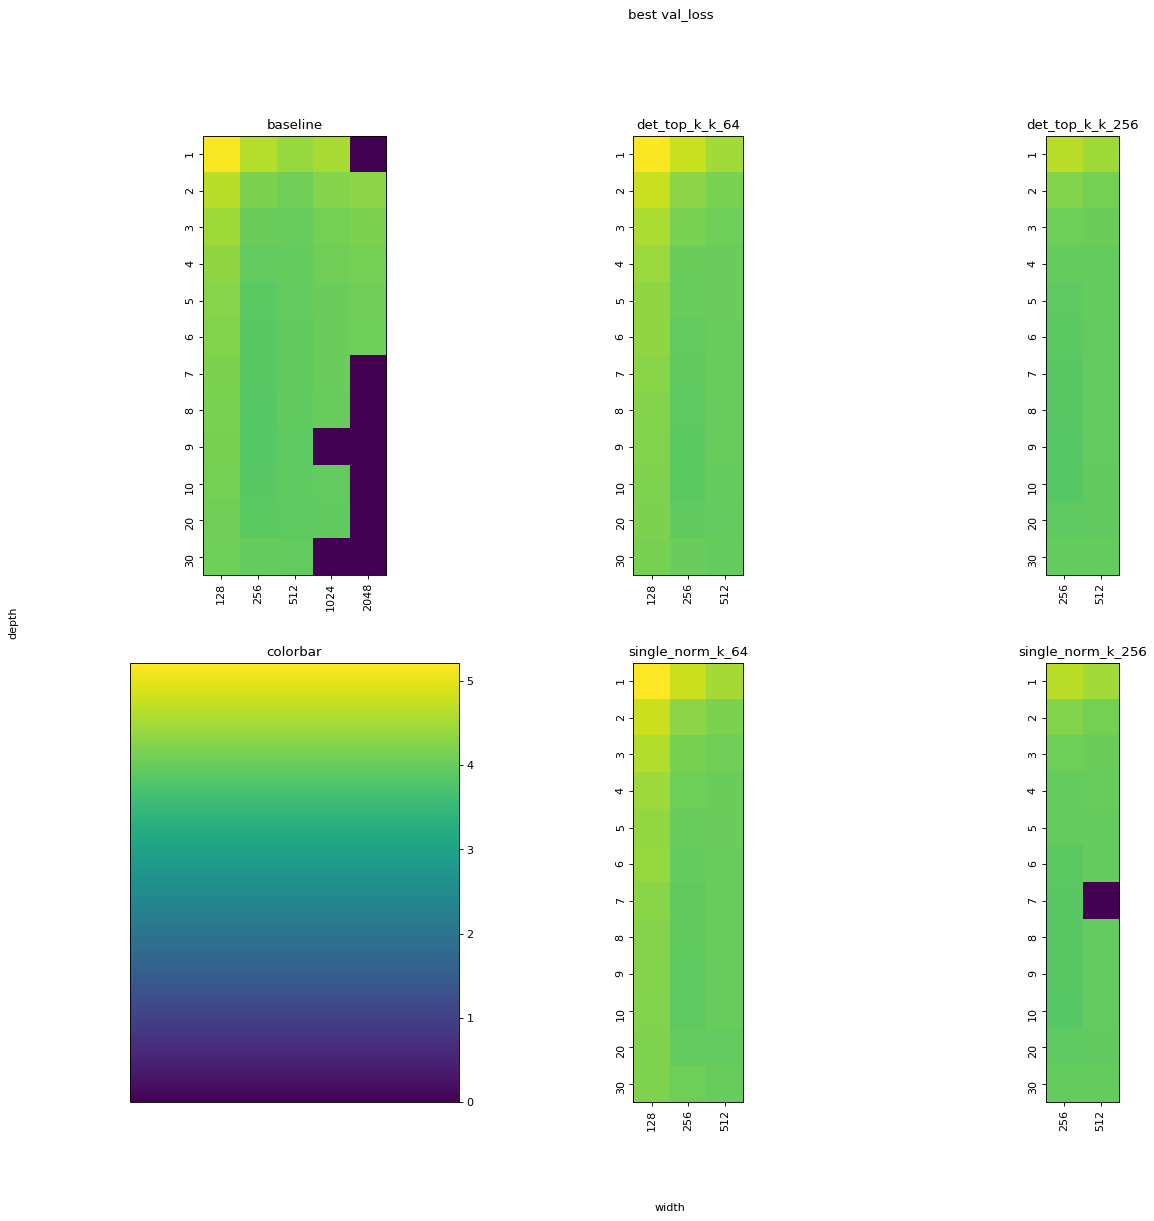

In [171]:
field = 'BEST_LOSS_VAL_EPOCH_120'
vmin, vmax = get_normalizing_values(field)
print(vmin, vmax)

fig, all_ax = plt.subplots(2, 3, figsize=(18, 16), dpi= 80)
result = make_heatmap(baseline_results, all_ax[0,0], title='baseline', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(det_top_k_k_64, all_ax[0,1], title='det_top_k_k_64', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(det_top_k_k_256, all_ax[0,2], title='det_top_k_k_256', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(single_norm_k_64, all_ax[1,1], title='single_norm_k_64', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(single_norm_k_256, all_ax[1,2], title='single_norm_k_256', field=field, vmin=vmin, vmax=vmax)

fig.text(0.5, 0.04, 'width', ha='center')
fig.text(0.04, 0.5, 'depth', va='center', rotation='vertical')
fig.suptitle('best val_loss')

fig.colorbar(result[0], cax=all_ax[1,0])
all_ax[1,0].set_title('colorbar')

0.0 35.09999847


Text(0.5, 1.0, 'colorbar')

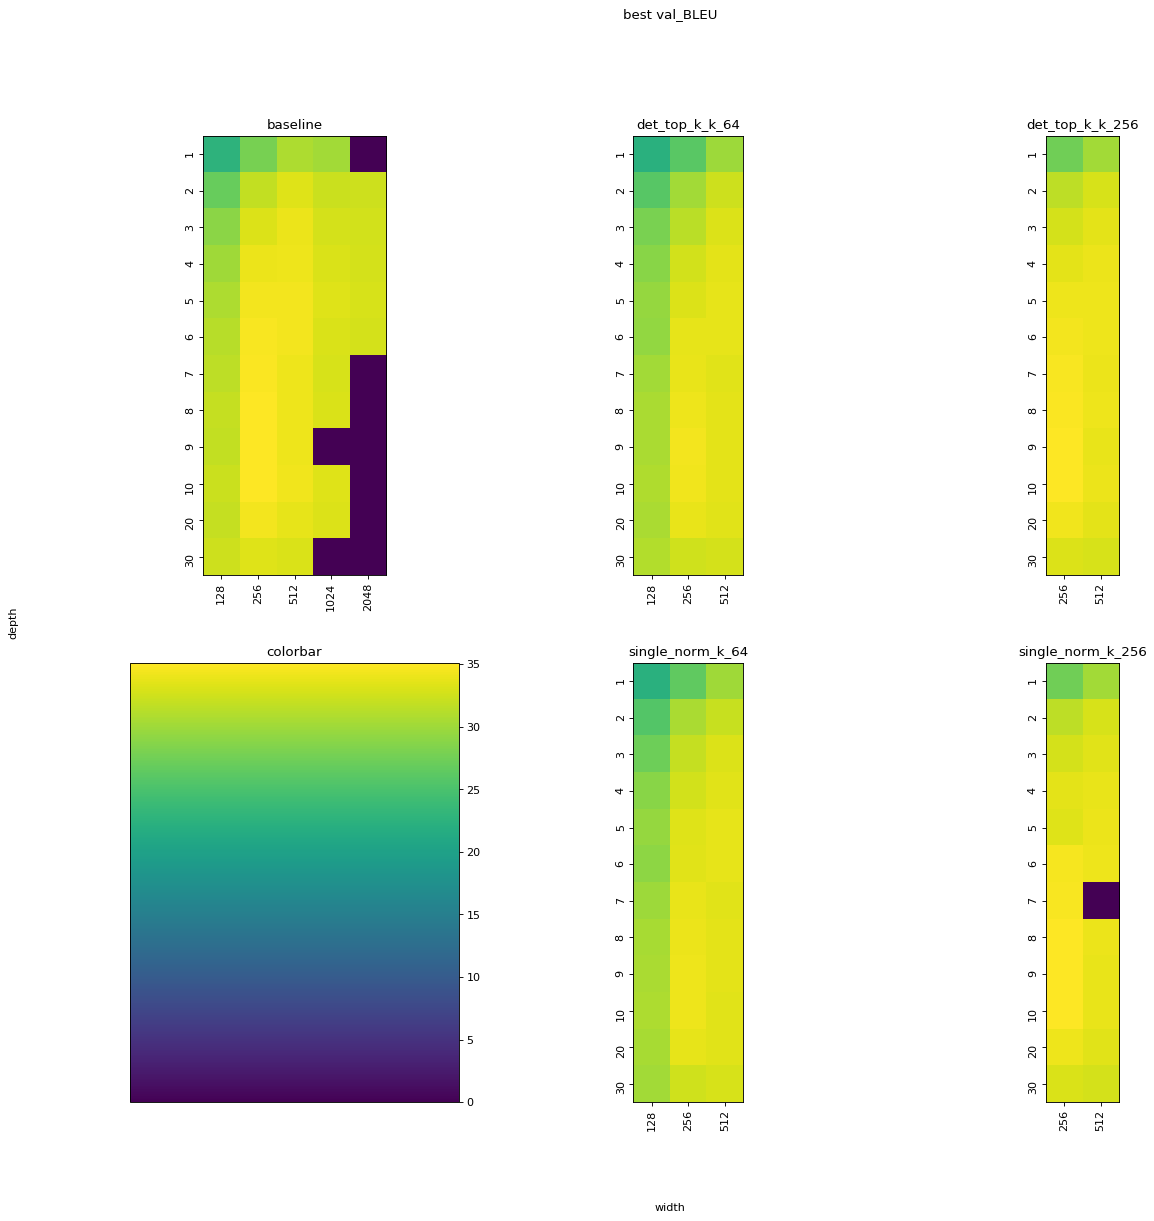

In [173]:
field = 'BEST_BLEU_VAL_EPOCH_120'
vmin, vmax = get_normalizing_values(field)
print(vmin, vmax)

fig, all_ax = plt.subplots(2, 3, figsize=(18, 16), dpi= 80)
result = make_heatmap(baseline_results, all_ax[0,0], title='baseline', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(det_top_k_k_64, all_ax[0,1], title='det_top_k_k_64', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(det_top_k_k_256, all_ax[0,2], title='det_top_k_k_256', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(single_norm_k_64, all_ax[1,1], title='single_norm_k_64', field=field, vmin=vmin, vmax=vmax)
result = make_heatmap(single_norm_k_256, all_ax[1,2], title='single_norm_k_256', field=field, vmin=vmin, vmax=vmax)

fig.text(0.5, 0.04, 'width', ha='center')
fig.text(0.04, 0.5, 'depth', va='center', rotation='vertical')
fig.suptitle('best val_BLEU')

fig.colorbar(result[0], cax=all_ax[1,0])
all_ax[1,0].set_title('colorbar')

#### Param Count Contours

In [209]:
# missing 7 depth-width combinations. add them here...
missing_combos = [  # (width, depth, param_count)
    (1024, 30, 644997120),
    (2048, 7, 618905600),
    (2048, 8, 702791680),
    (2048, 9, 786677760),
    (2048, 10, 870563840),
    (2048, 20, 1709424640),
    (2048, 30, 2548285440),
]

tmp = baseline_results.copy()
for width, depth, param_count in missing_combos:
    tmp = np.append(tmp, tmp[0])
    tmp[-1]['d_model_encoder_embed_dim'] = width
    tmp[-1]['n_layers_encoder_layers'] = depth
    tmp[-1]['Total_Params_formula_no_bias_or_LayerNorm_params'] = param_count

print(tmp[len(tmp) - len(missing_combos):]['d_model_encoder_embed_dim'])
print(tmp[len(tmp) - len(missing_combos):]['n_layers_encoder_layers'])
print(tmp[len(tmp) - len(missing_combos):]['Total_Params_formula_no_bias_or_LayerNorm_params'])

baseline_results_with_all_param_count_combos = tmp

print(len(baseline_results_with_all_param_count_combos))

[1024 2048 2048 2048 2048 2048 2048]
[30  7  8  9 10 20 30]
[ 644997120  618905600  702791680  786677760  870563840 1709424640
 2548285440]
113


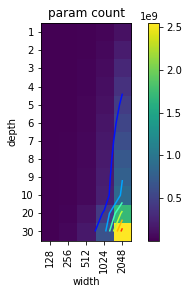

In [210]:
_, all_train_losses = make_heatmap(baseline_results_with_all_param_count_combos, ax=plt, title='param count', field='Total_Params_formula_no_bias_or_LayerNorm_params')
plt.colorbar()
plt.contour(all_train_losses, cmap='jet')#, levels=20)
# log scale param count?

#### Log Param Count Heatmap

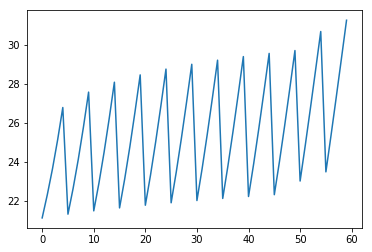

In [215]:
# plt.plot(all_train_losses.flatten())
log_param_count = np.log2(all_train_losses.flatten())
# log_param_count[log_param_count < 0] = 10  # set to a low value  # not necessary since we filled in the extra cells.
plt.plot(log_param_count)

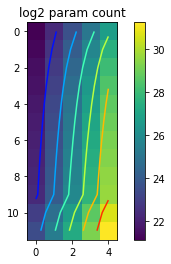

In [214]:
log_param_count = log_param_count.reshape(all_train_losses.shape)
plt.imshow(log_param_count)
plt.title('log2 param count')
plt.colorbar()
plt.contour(log_param_count, cmap='jet') # , levels=20

#### Speedup heatmap!!